# Classification

Classification is broadly the process of identifying what group or class a given data point should be a member of. Classification within ML is the process of learning the characteristics which distinguish one class from another.

## K-Nearest Neighboors Classification

K-Nearest Neighboors is a kind of classification where labeled examples of different classes are used to determine the classification of a new data point.

The new data point is compared against its neighboors. The new data point is assigned the class based on the largest representation of a given class.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
data = pd.read_csv('laptops.csv')

In [82]:
data = data[(data['brand'] == 'acer') | (data['brand'] == 'apple')]
data['Price'] = data['Price'].astype('float')
data['ram_memory'] = data['ram_memory'].astype('int')
data['usd'] = data['Price'] * 0.012
data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,usd
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62,intel,core i5,12,16,8,...,0,intel,integrated,False,14.0,1920,1080,windows,1,479.88
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,70990.0,45,apple,m1,8,8,8,...,0,apple,apple,False,13.3,2560,1600,mac,1,851.88
22,23,apple,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max...,399900.0,65,apple,m3,16,16,8,...,0,apple,apple,False,16.2,3456,2234,mac,1,4798.80
25,26,acer,Acer Nitro V ANV15-51 2023 Gaming Laptop (13th...,77990.0,63,intel,core i5,8,12,16,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,1,935.88
34,36,apple,Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ ...,102990.0,48,apple,m2,8,8,8,...,0,apple,apple,False,13.6,2560,1664,mac,1,1235.88


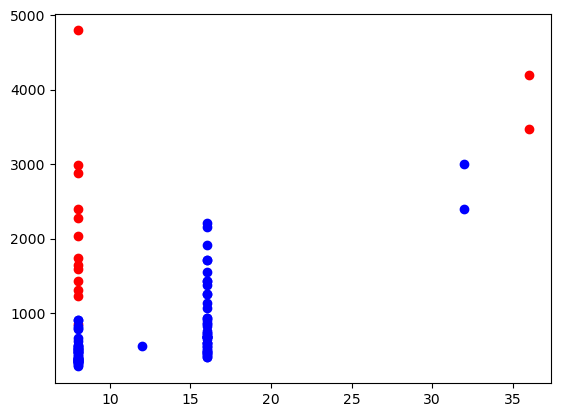

In [83]:
# Visualize how the data lines up for RAM vs Price
apple = data[data['brand'] == 'apple']
acer = data[data['brand'] == 'acer']

plt.scatter(apple['ram_memory'], apple['usd'], color='red')
plt.scatter(acer['ram_memory'], acer['usd'], color='blue')

In [87]:
data['label'] = data['brand'] == 'apple'
data['label'] = data['label'].astype(int)
data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,usd,label
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62,intel,core i5,12,16,8,...,intel,integrated,False,14.0,1920,1080,windows,1,479.88,0
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,70990.0,45,apple,m1,8,8,8,...,apple,apple,False,13.3,2560,1600,mac,1,851.88,1
22,23,apple,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max...,399900.0,65,apple,m3,16,16,8,...,apple,apple,False,16.2,3456,2234,mac,1,4798.80,1
25,26,acer,Acer Nitro V ANV15-51 2023 Gaming Laptop (13th...,77990.0,63,intel,core i5,8,12,16,...,nvidia,dedicated,False,15.6,1920,1080,windows,1,935.88,0
34,36,apple,Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ ...,102990.0,48,apple,m2,8,8,8,...,apple,apple,False,13.6,2560,1664,mac,1,1235.88,1


In [88]:
train_x = data[['ram_memory', 'usd']]
train_y = data['label']


model = KNeighborsClassifier(n_neighbors=3).fit(train_x, train_y)

In [91]:
predictions = model.predict(train_x.to_numpy())

/home/cbolles/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/cbolles/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [92]:
prediction_results = train
prediction_results['label'] = predictions

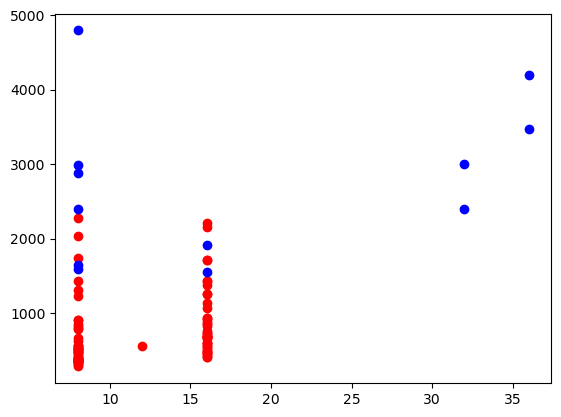

In [95]:
mean_1 = prediction_results[prediction_results['label'] == 0]
mean_2 = prediction_results[prediction_results['label'] == 1]

plt.scatter(mean_1['ram_memory'], mean_1['usd'], color='red')
plt.scatter(mean_2['ram_memory'], mean_2['usd'], color='blue')